In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Bar graphs and save the picture

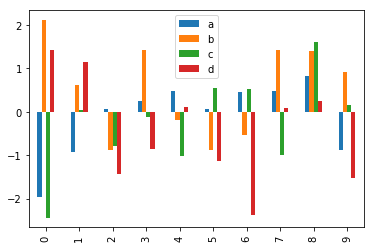

In [41]:
df_1 = pd.DataFrame(np.random.randn(10,4), columns =list('abcd'))
df_1.plot.bar()

In [2]:
world_cup_data_fp = r'./WorldCupMatches.csv'

In [3]:
df = pd.read_csv(world_cup_data_fp, usecols=range(13))

In [4]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 13 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
dtypes: float64(6), object(7)
memory usage: 464.4+ KB


In [6]:
# drop incomplete rows, this is a great dataset.
df = df.dropna()
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


### make datetime column as index

In [7]:
# The following line does not work.
# df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d %m %Y - %H:%M ')
df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True)

In [18]:
df['Datetime'].iloc[0]

Timestamp('1930-07-13 15:00:00')

In [8]:
# set Datetime as index
df.set_index('Datetime', inplace=True)

## World cup data set analysis

### Q1: which countries as away team scores the most of all time?

In [ ]:
most_away_goals = df.groupby('Away Team Name')['Away Team Goals'].sum()

In [73]:
most_away_goals.sort_values(ascending=False).head()

Away Team Name
Brazil         45.0
Spain          42.0
France         40.0
Netherlands    40.0
Mexico         36.0
Name: Away Team Goals, dtype: float64

In [25]:
def most_goals(df=None, home_goals=True, start_year=1900, end_year=2200, n_teams=5):
    if df is not None:
        years = df.index.year.isin(range(start_year, end_year))
        # subdf = df[(end_year >= df['Year']) & (df['Year'] >= start_year)]
        subdf = df.loc[years]
        if home_goals:
            goals = subdf.groupby('Home Team Name')['Home Team Goals'].sum()
        else:
            goals = subdf.groupby('Away Team Name')['Away Team Goals'].sum()
        return goals.sort_values(ascending=False).head(n_teams)
    return None

In [27]:
most_goals(df=df, home_goals=False, n_teams=10)

Away Team Name
Brazil         45.0
Spain          42.0
France         40.0
Netherlands    40.0
Mexico         36.0
Germany        35.0
Germany FR     32.0
Italy          29.0
Belgium        27.0
England        25.0
Name: Away Team Goals, dtype: float64

In [48]:
most_goals(df=df, home_goals=True, start_year=2000)

Home Team Name
Germany      43.0
Brazil       34.0
Argentina    26.0
Spain        19.0
Portugal     18.0
Name: Home Team Goals, dtype: float64

### Q2: plot number of home goals France scores over time

In [46]:
def home_goals_country(country, start_year, end_year):
    years = df.index.year.isin(range(start_year, end_year))
    country_df = df.loc[years]
    country_df[country_df['Home Team Name'] == 'France'].plot.bar(x='Year', y='Home Team Goals')

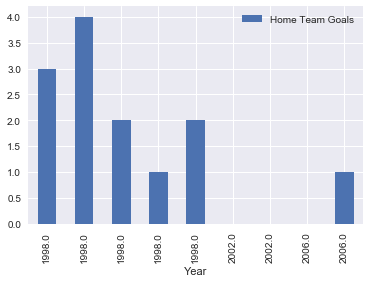

In [47]:
home_goals_country('France', 1990, 2010)

In [28]:
# old method
# subdf = df.groupby(['Year', 'Home Team Name']).sum().reset_index()
# subdf[subdf['Home Team Name']=='Brazil'].plot.bar(x='Year', y='Home Team Goals')

### Q3: How many goals Brazil scored VS Germany ever since 1990?

In [66]:
def compare_goals_by_country(df, country_a, country_b, start_year=1900, end_year=2200):
    # limit years range
    years = df.index.year.isin(range(start_year, end_year))
    df = df.loc[years]
    
    # group by both year and national team name as home team and sum up all home goals
    subdf_home = df.groupby(['Year', 'Home Team Name']).sum().reset_index()
    
    # group by both year and national team name as away team and sum up all away goals
    subdf_away = df.groupby(['Year', 'Away Team Name']).sum().reset_index()
    
    # join on 'Year'
    combined = subdf_home.set_index('Year').join(subdf_away.set_index('Year'), 
                                                lsuffix='_caller', 
                                                 rsuffix='_other',
                                                )
    
    # filter out cross-country data
    sub_combined = combined[combined['Home Team Name'] == combined['Away Team Name']]
    
    # create total goals column
    # ref: https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
    sub_combined = sub_combined.assign(total_goals=sub_combined['Home Team Goals_caller'] 
                                       + sub_combined['Away Team Goals_other'])
    
    # final filtering of country_a and country_b
    final_df = sub_combined[((sub_combined['Home Team Name']==country_a)|
                     (sub_combined['Home Team Name']==country_b))].reset_index()
    
    # create bar plot
    sns.barplot(x='Year', y='total_goals', hue='Home Team Name', data=final_df)
    
    

In [52]:
from collections import Counter
def compute_goals_by_country(df, country_a, country_b, start_year=1900, end_year=2200):
    years = df.index.year.isin(range(start_year, end_year))
    df = df.loc[years]
    subdf_home = df.groupby(['Year', 'Home Team Name']).sum().reset_index()
    subdf_away = df.groupby(['Year', 'Away Team Name']).sum().reset_index()
    goals_country_a, goals_country_b = Counter(), Counter()
    
    for ix, home_rec in subdf_home.iterrows():
        if home_rec['Home Team Name'] == country_a:
            goals_country_a[home_rec['Year']] = home_rec['Home Team Goals']
        elif home_rec['Home Team Name'] == country_b:
            goals_country_b[home_rec['Year']] = home_rec['Home Team Goals']
            
    for ix, away_rec in subdf_away.iterrows():
        if away_rec['Away Team Name'] == country_a:
            goals_country_a[away_rec['Year']] += away_rec['Away Team Goals']
        elif away_rec['Away Team Name'] == country_b:
            goals_country_b[away_rec['Year']] += away_rec['Away Team Goals']
    
    return goals_country_a, goals_country_b

In [53]:
r_a,r_b = compute_goals_by_country(df, 'Brazil', 'Germany', start_year=1990)
r_b

Counter({1994.0: 9.0,
         1998.0: 8.0,
         2002.0: 14.0,
         2006.0: 14.0,
         2010.0: 16.0,
         2014.0: 29.0})

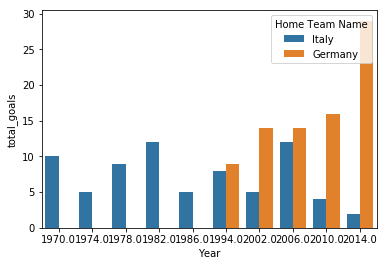

In [67]:
compare_goals_by_country(df, 'Italy', 'Germany', start_year=1970)